In [9]:
import pandas as pd
import numpy as np
from array import array
import re
import os
import parselmouth
from parselmouth.praat import call
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
speakers = []
emotion = []
pitch_arr = []
itensity_arr = []

for filename in os.listdir('hw3_speech_files'):
        f = os.path.join('hw3_speech_files', filename)
        # checking if it is a file
        if os.path.isfile(f):
            elem = re.split('_', filename)
            speaker = elem[0] + '_' + elem[1]
            speakers.append(speaker)
            emotion.append(elem[2])
            
            snd = parselmouth.Sound(f)
            pitch = snd.to_pitch()
            pitch_values = pitch.selected_array['frequency']
#           exclude 0 values
            pitch_values = pitch_values[pitch_values != 0]
            pitch_arr.append(pitch_values)
       
            intensity = snd.to_intensity()
            intensity_values = intensity.values
            itensity_arr.append(intensity_values[0])

In [12]:
data = pd.DataFrame({'speakers': speakers, 
                     'emotion': emotion, 
                     'pitch_array': pitch_arr, 
                     'itensity_arr': itensity_arr})
data

,speakers,emotion,pitch_array,itensity_arr
0,mf_001,interest,"[147.61835093558605, 146.88637319738407, 155.7...","[64.74908764921236, 67.49668675896126, 67.8868..."
1,mf_001,anxiety,"[162.0423510897393, 159.36853694756837, 155.74...","[43.17270505716043, 44.04105303478356, 45.7265..."
2,cc_001,pride,"[137.41666301265207, 136.17449197038184, 141.3...","[32.74869199185138, 33.18222036922232, 38.0394..."
3,cc_001,boredom,"[111.36167226460664, 112.03084373199815, 107.9...","[37.04257424183074, 35.039336979296195, 32.014..."
4,jg_001,panic,"[232.79587245305626, 219.80523572351808, 207.4...","[29.208607959920762, 29.293720260508962, 30.04..."
...,...,...,...,...
2319,cl_001,despair,"[103.61561522216114, 107.80286185292908, 102.9...","[43.81976268932851, 42.88621043549852, 43.9363..."
2320,cl_001,anxiety,"[132.0530728410789, 125.6158241491078, 119.330...","[40.63338218678753, 39.84728575952245, 39.6358..."
2321,mf_001,happy,"[238.66582953817098, 226.56130192996582, 240.8...","[70.54934509328773, 74.23290908657773, 78.2435..."
2322,cc_001,shame,"[160.53064517802292, 155.7283520474257, 148.42...","[39.42058961125308, 38.22360824079004, 35.1885..."


In [13]:
pitch = data['pitch_array']
intensity = data['itensity_arr']

In [14]:
mean_pitch = []
max_pitch = []
min_pitch = []

for p in pitch:
    mean_pitch.append(np.mean(p))
    max_pitch.append(np.max(p))
    min_pitch.append(np.min(p))
    
mean_int = []
max_int = []
min_int = []

for i in intensity:
    mean_int.append(np.mean(i))
    max_int.append(np.max(i))
    min_int.append(np.min(i))
    
# check length all adds up
print(len(min_pitch) == len(min_int) == len(max_pitch) == len(mean_int))

data['mean_pitch'] = mean_pitch
data['max_pitch'] = max_pitch
data['min_pitch'] = min_pitch
data['mean_int'] = mean_int
data['max_int'] = max_int
data['min_int'] = min_int

True


In [15]:
print(len(data.speakers.unique()))
print(data.speakers.unique())

7
['mf_001' 'cc_001' 'jg_001' 'mm_001' 'cl_001' 'gg_001' 'mk_001']


In [16]:
print(data.emotion.unique())
print(len(data.emotion.unique()))

['interest' 'anxiety' 'pride' 'boredom' 'panic' 'cold-anger' 'neutral'
 'contempt' 'elation' 'happy' 'shame' 'disgust' 'sadness' 'despair'
 'hot-anger']
15


In [17]:
data

,speakers,emotion,pitch_array,itensity_arr,mean_pitch,max_pitch,min_pitch,mean_int,max_int,min_int
0,mf_001,interest,"[147.61835093558605, 146.88637319738407, 155.7...","[64.74908764921236, 67.49668675896126, 67.8868...",298.642767,396.699742,136.715830,54.803106,68.909546,34.538067
1,mf_001,anxiety,"[162.0423510897393, 159.36853694756837, 155.74...","[43.17270505716043, 44.04105303478356, 45.7265...",164.339495,240.097190,146.910323,62.410868,71.124587,43.172705
2,cc_001,pride,"[137.41666301265207, 136.17449197038184, 141.3...","[32.74869199185138, 33.18222036922232, 38.0394...",150.376392,563.976473,92.859850,53.703821,70.459104,32.748692
3,cc_001,boredom,"[111.36167226460664, 112.03084373199815, 107.9...","[37.04257424183074, 35.039336979296195, 32.014...",128.143332,218.513929,88.458167,54.254604,67.555128,30.980761
4,jg_001,panic,"[232.79587245305626, 219.80523572351808, 207.4...","[29.208607959920762, 29.293720260508962, 30.04...",177.215006,232.795872,146.097492,44.480034,64.293261,27.718521
...,...,...,...,...,...,...,...,...,...,...
2319,cl_001,despair,"[103.61561522216114, 107.80286185292908, 102.9...","[43.81976268932851, 42.88621043549852, 43.9363...",100.651648,118.348150,75.764495,59.816068,78.759797,41.646280
2320,cl_001,anxiety,"[132.0530728410789, 125.6158241491078, 119.330...","[40.63338218678753, 39.84728575952245, 39.6358...",95.655567,132.053073,79.283986,51.115777,73.931722,30.654305
2321,mf_001,happy,"[238.66582953817098, 226.56130192996582, 240.8...","[70.54934509328773, 74.23290908657773, 78.2435...",335.407536,413.125009,203.193205,72.956465,90.030804,38.087656
2322,cc_001,shame,"[160.53064517802292, 155.7283520474257, 148.42...","[39.42058961125308, 38.22360824079004, 35.1885...",121.953149,160.530645,83.622063,57.455757,72.704585,29.693354


In [18]:
s = data['speakers'].unique()

In [19]:
speakers = []
emotion_arr = []
pitch_arr_norm = []
itensity_arr_norm = []
    
for speaker in s:
    sound_bits = data.loc[data['speakers'] == speaker]
    emotion = list(sound_bits['emotion'])
    pitch_array = sound_bits['pitch_array']
    intensity_array = sound_bits['itensity_arr']
    master_pitch_arr = np.array([])
    master_intensity_arr = np.array([])
    
    for array in pitch_array:
        master_pitch_arr = np.concatenate([master_pitch_arr, array])
        
    for array in intensity_array:
        master_intensity_arr = np.concatenate([master_intensity_arr, array])
        
    pitch_mean = np.mean(master_pitch_arr)
    pitch_std = np.std(master_pitch_arr)
    
    intensity_mean = np.mean(master_intensity_arr)
    intensity_std = np.std(master_intensity_arr)

    print('speaker: ', speaker)
    print('pitch mean: ', pitch_mean)
    print('pitch std: ', pitch_std)
    print('intensity mean: ', intensity_mean)
    print('intensity std: ', intensity_std, '\n')

    # Normalize each raw pitch array using the formula (x - mean)/std, where x is an element in a pitch array.
    normalized_pitch_arr = []
    for p in pitch_array:
        normalized_pitch_arr = (p - pitch_mean) / pitch_std
        pitch_arr_norm.append(normalized_pitch_arr)
        
    normalized_intensity_arr = []
    for p in pitch_array:
        normalized_intensity_arr = (p - pitch_mean) / pitch_std

        speakers.append(speaker)
        itensity_arr_norm.append(normalized_intensity_arr)

    emotion_arr = np.concatenate([emotion_arr, emotion])

speaker:  mf_001
pitch mean:  192.57254609620682
pitch std:  86.94682941747429
intensity mean:  61.188993325967274
intensity std:  12.18697463084147 

speaker:  cc_001
pitch mean:  175.52897664377306
pitch std:  91.33230342627544
intensity mean:  57.2198516914481
intensity std:  14.909703520831759 

speaker:  jg_001
pitch mean:  255.94818133940225
pitch std:  91.51890948272474
intensity mean:  54.745747667062005
intensity std:  14.480419646349656 

speaker:  mm_001
pitch mean:  229.38169426874677
pitch std:  108.01718035217968
intensity mean:  59.599838899859186
intensity std:  11.59963876534345 

speaker:  cl_001
pitch mean:  155.34001241056717
pitch std:  103.71776917098103
intensity mean:  55.72475621666243
intensity std:  15.093691030127001 

speaker:  gg_001
pitch mean:  256.39353207143586
pitch std:  102.18755338950422
intensity mean:  62.918268459317005
intensity std:  11.56084252628354 

speaker:  mk_001
pitch mean:  302.76408575294425
pitch std:  106.24295502638076
intensity m

In [20]:
normalized_data = pd.DataFrame({'speakers': speakers,
                                'emotion': emotion_arr,
                                'pitch_array': pitch_arr_norm,
                                'itensity_arr': itensity_arr_norm})

normalized_data

,speakers,emotion,pitch_array,itensity_arr
0,mf_001,interest,"[-0.5170308734867568, -0.5254495558367179, -0....","[-0.5170308734867568, -0.5254495558367179, -0...."
1,mf_001,anxiety,"[-0.3511363808319808, -0.381888671169477, -0.4...","[-0.3511363808319808, -0.381888671169477, -0.4..."
2,mf_001,anxiety,"[-0.7015366778822872, -0.7163124099570395, -0....","[-0.7015366778822872, -0.7163124099570395, -0...."
3,mf_001,interest,"[0.17428404400275826, 0.3863759601477092, 0.57...","[0.17428404400275826, 0.3863759601477092, 0.57..."
4,mf_001,happy,"[0.1763239814129623, 0.19926995256527166, 0.29...","[0.1763239814129623, 0.19926995256527166, 0.29..."
...,...,...,...,...
2319,mk_001,disgust,"[0.0654415429078974, 0.15350219357581746, 0.16...","[0.0654415429078974, 0.15350219357581746, 0.16..."
2320,mk_001,happy,"[0.873187997146476, 0.8791318253606485, 0.8890...","[0.873187997146476, 0.8791318253606485, 0.8890..."
2321,mk_001,shame,"[1.2571655320661015, 1.1557071333264695, 1.074...","[1.2571655320661015, 1.1557071333264695, 1.074..."
2322,mk_001,contempt,"[0.5769864720353073, 0.6310376070063108, 0.604...","[0.5769864720353073, 0.6310376070063108, 0.604..."


In [21]:
# Get an OVERALL mean and std pitch of each speaker using all raw pitch arrays 
# from each speaker (not the mean and std of min-pitch values 

speakers = []
emotion_arr = []
pitch_arr_norm = []
itensity_arr_norm = []

for speaker in s:
    sound_bits = normalized_data.loc[data['speakers'] == speaker]
    emotion = list(sound_bits['emotion'])
    pitch_array = sound_bits['pitch_array']
    intensity_array = sound_bits['itensity_arr']
    master_pitch_arr = np.array([])
    master_intensity_arr = np.array([])

    for array in pitch_array:
        master_pitch_arr = np.concatenate([master_pitch_arr, array])

    for array in intensity_array:
        master_intensity_arr = np.concatenate([master_intensity_arr, array])

    pitch_mean = np.mean(master_pitch_arr)
    pitch_std = np.std(master_pitch_arr)
 
    intensity_mean = np.mean(master_intensity_arr)
    intensity_std = np.std(master_intensity_arr)
 
    print('speaker: ', speaker)
    print('pitch mean: ', pitch_mean)
    print('pitch std: ', pitch_std)
    print('intensity mean: ', intensity_mean)
    print('intensity std: ', intensity_std, '\n')

    # Normalize each raw pitch array using the formula (x - mean)/std, where x is an element in a pitch array.
    normalized_pitch_arr = []
    for p in pitch_array:
        normalized_pitch_arr = (p - pitch_mean) / pitch_std
 
        pitch_arr_norm.append(normalized_pitch_arr)
 
    normalized_intensity_arr = []
    for i in intensity_array:
        normalized_intensity_arr = (i - intensity_mean) / intensity_std
 
        itensity_arr_norm.append(normalized_intensity_arr)

speaker:  mf_001
pitch mean:  0.028666065492669823
pitch std:  1.0058232968545175
intensity mean:  0.028666065492669823
intensity std:  1.0058232968545175 

speaker:  cc_001
pitch mean:  0.043103638713244324
pitch std:  1.0453714378841437
intensity mean:  0.043103638713244324
intensity std:  1.0453714378841437 

speaker:  jg_001
pitch mean:  -0.011007308990345459
pitch std:  0.9511778503846614
intensity mean:  -0.011007308990345459
intensity std:  0.9511778503846614 

speaker:  mm_001
pitch mean:  -0.04576199004073432
pitch std:  0.9836542918660992
intensity mean:  -0.04576199004073432
intensity std:  0.9836542918660992 

speaker:  cl_001
pitch mean:  -0.008730481750988296
pitch std:  0.9956660054976145
intensity mean:  -0.008730481750988296
intensity std:  0.9956660054976145 

speaker:  gg_001
pitch mean:  0.033766675475599035
pitch std:  1.0146589144631393
intensity mean:  0.033766675475599035
intensity std:  1.0146589144631393 

speaker:  mk_001
pitch mean:  -0.03671135920663204
pit

In [22]:
pitch = normalized_data['pitch_array']
intensity = normalized_data['itensity_arr']

In [23]:
mean_pitch = []
max_pitch = []
min_pitch = []

for p in pitch:
    mean_pitch.append(np.mean(p))
    max_pitch.append(np.max(p))
    min_pitch.append(np.min(p))
    
mean_int = []
max_int = []
min_int = []

for i in intensity:
    mean_int.append(np.mean(i))
    max_int.append(np.max(i))
    min_int.append(np.min(i))
    
# check length all adds up
print(len(min_pitch) == len(min_int) == len(max_pitch) == len(mean_int))

normalized_data['mean_pitch'] = mean_pitch
normalized_data['max_pitch'] = max_pitch
normalized_data['min_pitch'] = min_pitch
normalized_data['mean_int'] = mean_int
normalized_data['max_int'] = max_int
normalized_data['min_int'] = min_int

True


In [24]:
normalized_data['mean_pitch'] = mean_pitch
normalized_data['max_pitch'] = max_pitch
normalized_data['min_pitch'] = min_pitch
normalized_data['mean_int'] = mean_int
normalized_data['max_int'] = max_int
normalized_data['min_int'] = min_int

In [25]:
normalized_data

,speakers,emotion,pitch_array,itensity_arr,mean_pitch,max_pitch,min_pitch,mean_int,max_int,min_int
0,mf_001,interest,"[-0.5170308734867568, -0.5254495558367179, -0....","[-0.5170308734867568, -0.5254495558367179, -0....",1.219944,2.347724,-0.642424,1.219944,2.347724,-0.642424
1,mf_001,anxiety,"[-0.3511363808319808, -0.381888671169477, -0.4...","[-0.3511363808319808, -0.381888671169477, -0.4...",-0.324716,0.546594,-0.525174,-0.324716,0.546594,-0.525174
2,mf_001,anxiety,"[-0.7015366778822872, -0.7163124099570395, -0....","[-0.7015366778822872, -0.7163124099570395, -0....",-0.853535,-0.701537,-0.985007,-0.853535,-0.701537,-0.985007
3,mf_001,interest,"[0.17428404400275826, 0.3863759601477092, 0.57...","[0.17428404400275826, 0.3863759601477092, 0.57...",0.676133,1.253281,-0.596277,0.676133,1.253281,-0.596277
4,mf_001,happy,"[0.1763239814129623, 0.19926995256527166, 0.29...","[0.1763239814129623, 0.19926995256527166, 0.29...",1.572732,3.007965,0.092182,1.572732,3.007965,0.092182
...,...,...,...,...,...,...,...,...,...,...
2319,mk_001,disgust,"[0.0654415429078974, 0.15350219357581746, 0.16...","[0.0654415429078974, 0.15350219357581746, 0.16...",-0.551784,2.369530,-1.068126,-0.551784,2.369530,-1.068126
2320,mk_001,happy,"[0.873187997146476, 0.8791318253606485, 0.8890...","[0.873187997146476, 0.8791318253606485, 0.8890...",0.641417,1.576128,-0.715262,0.641417,1.576128,-0.715262
2321,mk_001,shame,"[1.2571655320661015, 1.1557071333264695, 1.074...","[1.2571655320661015, 1.1557071333264695, 1.074...",0.249441,2.792804,-1.913901,0.249441,2.792804,-1.913901
2322,mk_001,contempt,"[0.5769864720353073, 0.6310376070063108, 0.604...","[0.5769864720353073, 0.6310376070063108, 0.604...",0.030062,0.839769,-1.234138,0.030062,0.839769,-1.234138


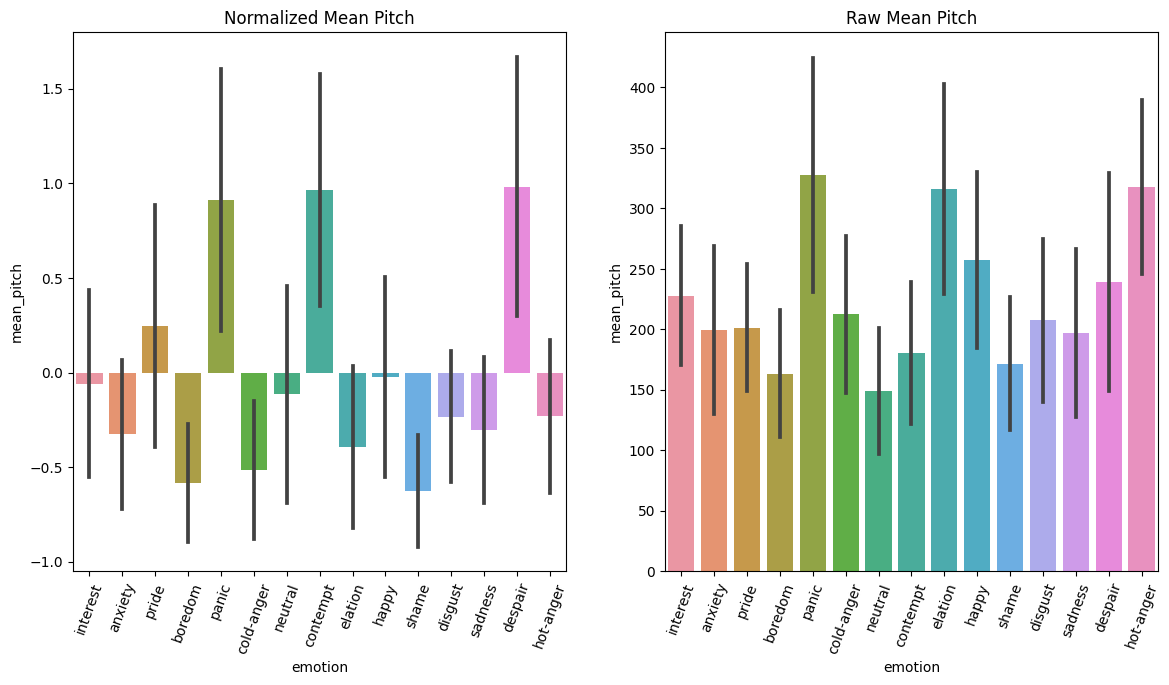

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(14, 7))

sns.barplot(data=normalized_data, x="emotion", y="mean_pitch", ax=ax1, errorbar="sd")
sns.barplot(data=data, x="emotion", y="mean_pitch", ax=ax2, errorbar="sd")
plt.xticks(rotation=45)
ax1.tick_params(axis='x', labelrotation=70)
ax1.set_title('Normalized Mean Pitch')
ax2.tick_params(axis='x', labelrotation=70)
ax2.set_title('Raw Mean Pitch')

plt.show()

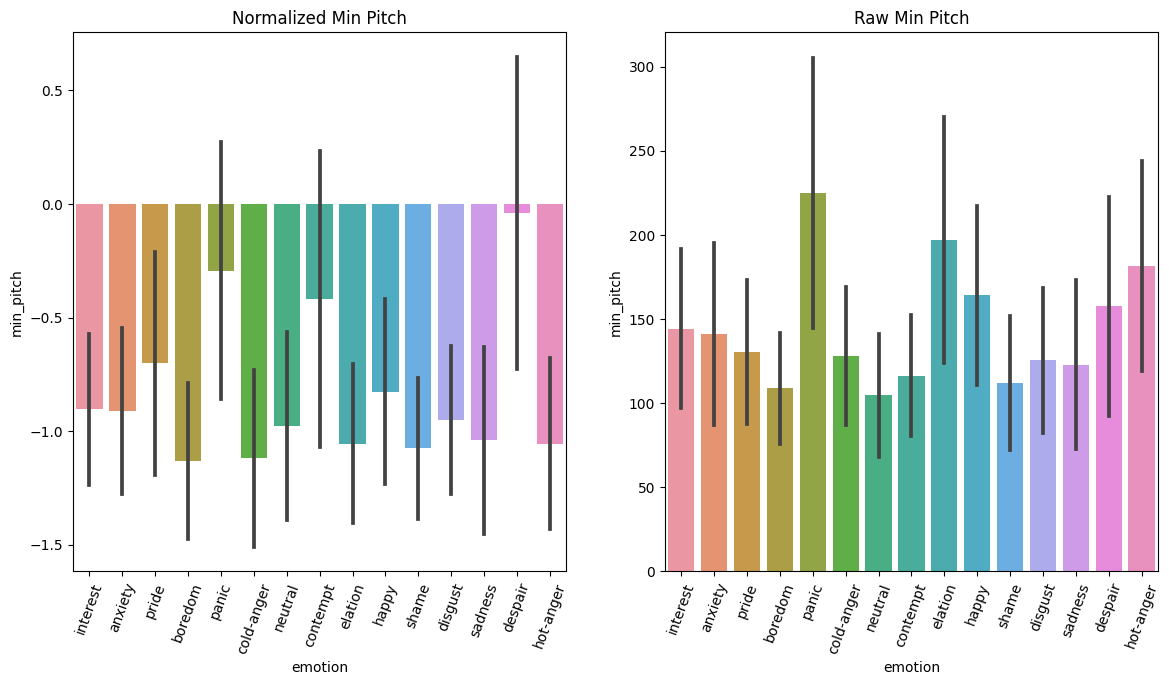

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(14, 7))

sns.barplot(data=normalized_data, x="emotion", y="min_pitch", ax=ax1, errorbar="sd")
sns.barplot(data=data, x="emotion", y="min_pitch", ax=ax2, errorbar="sd")
plt.xticks(rotation=45)
ax1.tick_params(axis='x', labelrotation=70)
ax1.set_title('Normalized Min Pitch')
ax2.tick_params(axis='x', labelrotation=70)
ax2.set_title('Raw Min Pitch')

plt.show()

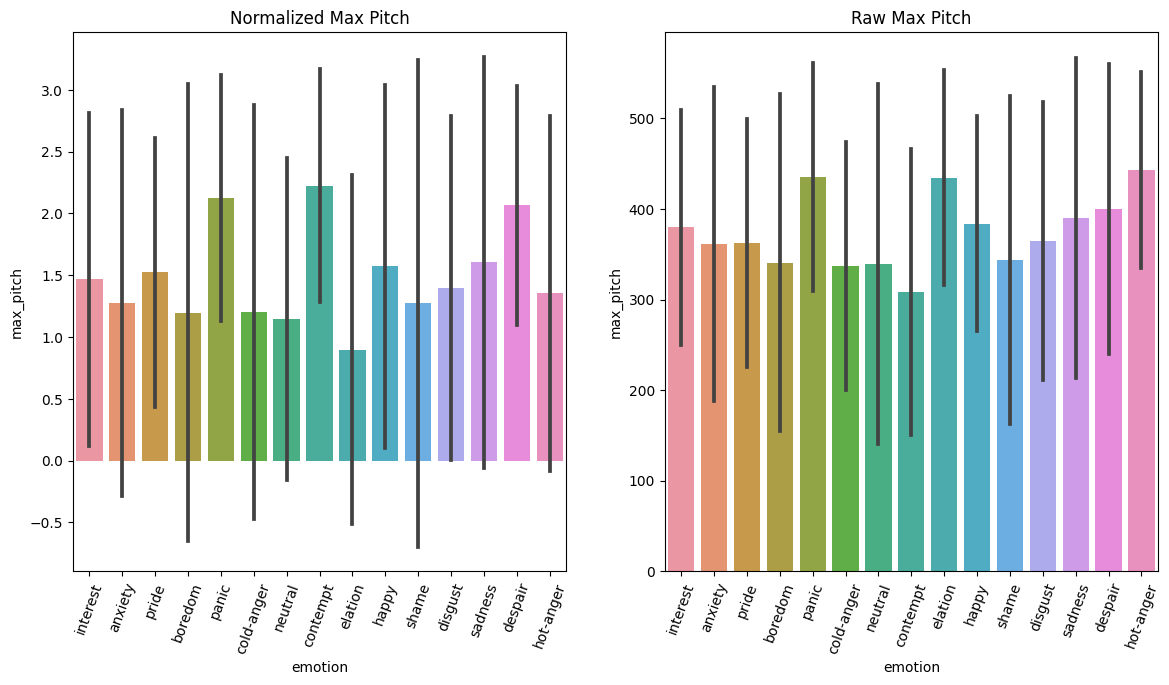

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(14, 7))

sns.barplot(data=normalized_data, x="emotion", y="max_pitch", ax=ax1, errorbar="sd")
sns.barplot(data=data, x="emotion", y="max_pitch", ax=ax2, errorbar="sd")
plt.xticks(rotation=45)
ax1.tick_params(axis='x', labelrotation=70)
ax1.set_title('Normalized Max Pitch')
ax2.tick_params(axis='x', labelrotation=70)
ax2.set_title('Raw Max Pitch')

plt.show()

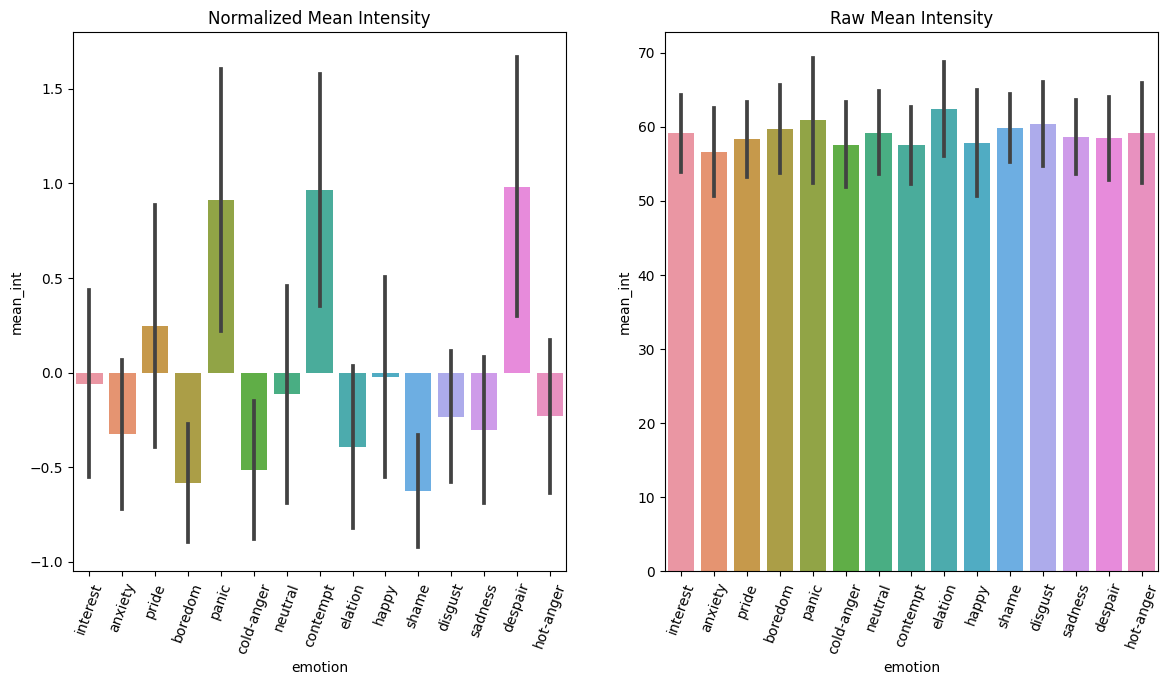

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(14, 7))

sns.barplot(data=normalized_data, x="emotion", y="mean_int", ax=ax1, errorbar="sd")
sns.barplot(data=data, x="emotion", y="mean_int", ax=ax2, errorbar="sd")
plt.xticks(rotation=45)
ax1.tick_params(axis='x', labelrotation=70)
ax1.set_title('Normalized Mean Intensity')
ax2.tick_params(axis='x', labelrotation=70)
ax2.set_title('Raw Mean Intensity')

plt.show()

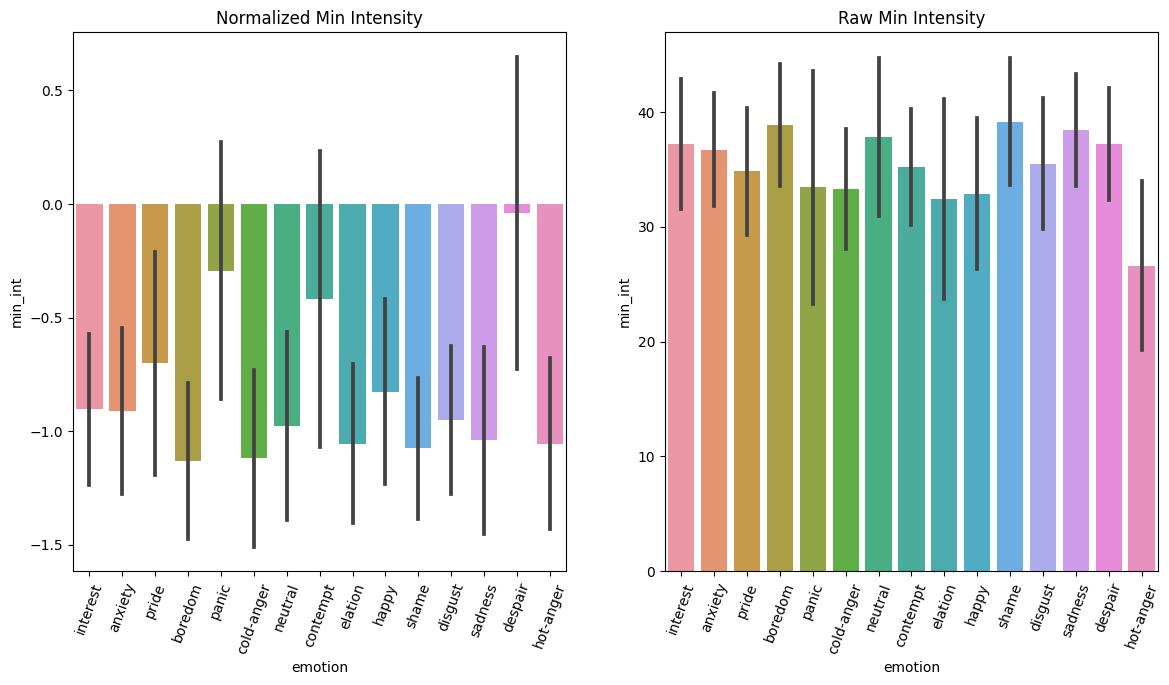

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(14, 7))

sns.barplot(data=normalized_data, x="emotion", y="min_int", ax=ax1, errorbar="sd")
sns.barplot(data=data, x="emotion", y="min_int", ax=ax2, errorbar="sd")
plt.xticks(rotation=45)
ax1.tick_params(axis='x', labelrotation=70)
ax1.set_title('Normalized Min Intensity')
ax2.tick_params(axis='x', labelrotation=70)
ax2.set_title('Raw Min Intensity')

plt.show()

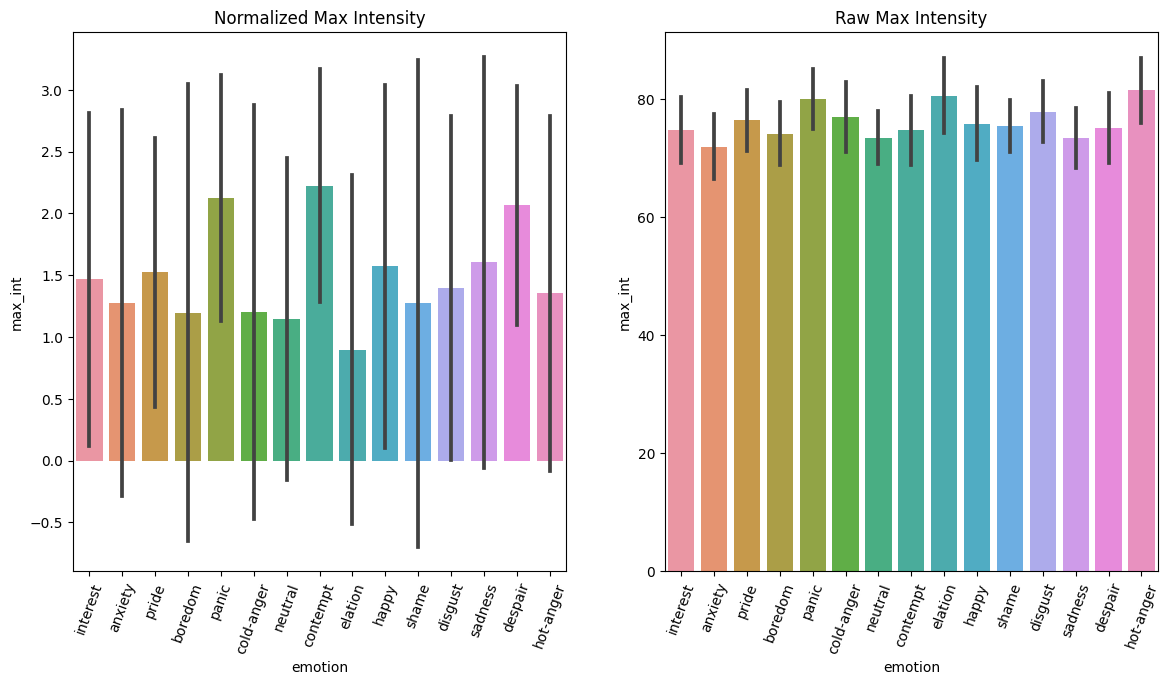

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(14, 7))

sns.barplot(data=normalized_data, x="emotion", y="max_int", ax=ax1, errorbar="sd")
sns.barplot(data=data, x="emotion", y="max_int", ax=ax2, errorbar="sd")
plt.xticks(rotation=45)
ax1.tick_params(axis='x', labelrotation=70)
ax1.set_title('Normalized Max Intensity')
ax2.tick_params(axis='x', labelrotation=70)
ax2.set_title('Raw Max Intensity')

plt.show()